# 🛍️ Homework M4L7 - Clustering y Segmentación de Clientes
## Mall Customers - Análisis No Supervisado

---

## 📋 Contexto

Un centro comercial (**Mall**) quiere **segmentar a sus clientes** para:
- 🎯 Crear campañas de marketing personalizadas
- 💰 Aumentar ventas con ofertas específicas por grupo
- 🎁 Desarrollar un sistema de recomendación

**Problema**: No tenemos etiquetas (no sabemos a qué grupo pertenece cada cliente)

**Solución**: Usaremos **Aprendizaje No Supervisado** para descubrir grupos naturales.

---

## 📚 ¿Qué es el Aprendizaje No Supervisado?

### Diferencia con Supervisado:

**🔵 Aprendizaje Supervisado** (clases previas):
```
Datos: [Cliente A: características] → Etiqueta: "Se fue" (Churn)
Objetivo: Predecir la etiqueta de nuevos clientes
Ejemplo: Regresión Logística, XGBoost
```

**🟣 Aprendizaje No Supervisado** (esta clase):
```
Datos: [Cliente A: características] → ??? (sin etiqueta)
Objetivo: Descubrir patrones y grupos naturales
Ejemplo: K-Means, DBSCAN, PCA
```

### ¿Para qué sirve?

1. **Segmentación de clientes** → Marketing personalizado
2. **Detección de anomalías** → Fraude, errores
3. **Reducción de dimensiones** → Simplificar datos complejos
4. **Sistemas de recomendación** → "Clientes como tú también compraron..."

---

## 🎯 Objetivos del Homework

1. ✅ Explorar dataset de 200 clientes del mall
2. ✅ Aplicar **K-Means** con diferentes números de clusters (k)
3. ✅ Evaluar con **Método del Codo** y **Silueta**
4. ✅ Visualizar clusters con **PCA** en 2D
5. ✅ Interpretar grupos y su utilidad para recomendaciones

---

## 📚 Conceptos Clave (Definiciones)

### 🔹 **Clustering (Agrupamiento)**
- **Qué es:** Agrupar datos similares sin saber las etiquetas de antemano
- **Ejemplo:** Agrupar clientes por comportamiento similar

### 🔹 **K-Means**
- **Qué es:** Algoritmo que divide datos en K grupos (clusters)
- **Cómo:** Encuentra K centroides (centros) y asigna cada punto al centroide más cercano
- **Ejemplo:** K=3 → divide clientes en 3 grupos

### 🔹 **Centroide**
- **Qué es:** Punto central de un cluster (promedio de todos los puntos del grupo)
- **Ejemplo:** Si cluster tiene edades [20, 25, 30] → centroide edad = 25

### 🔹 **Inercia (SSE - Sum of Squared Errors)**
- **Qué es:** Suma de distancias al cuadrado de cada punto a su centroide
- **Interpretación:** Más bajo = clusters más compactos (puntos cerca de sus centros)
- **Ejemplo:** Si todos los puntos están muy cerca del centro → inercia baja

### 🔹 **Método del Codo (Elbow Method)**
- **Qué es:** Gráfico de inercia vs número de clusters (k)
- **Cómo encontrar k óptimo:** Buscar el "codo" (donde la mejora se desacelera)
- **Ejemplo:** K=1 → inercia alta, K=10 → inercia baja, pero k=3 es el codo

### 🔹 **Coeficiente de Silueta (Silhouette Score)**
- **Qué es:** Métrica que mide qué tan bien asignado está cada punto a su cluster
- **Rango:** -1 (mal asignado) a +1 (perfectamente asignado)
- **Interpretación:**
  - **> 0.7**: Clusters muy bien definidos
  - **0.5-0.7**: Estructura razonable
  - **0.2-0.5**: Estructura débil pero útil
  - **< 0.2**: Sin estructura clara
- **Ejemplo:** Si punto está muy cerca de su cluster y lejos de otros → silueta alta

### 🔹 **PCA (Principal Component Analysis)**
- **Qué es:** Técnica que reduce dimensiones manteniendo la máxima información (varianza)
- **Ejemplo:** Tener 10 variables → PCA las convierte en 2 componentes principales
- **Por qué:** Facilita visualización y reduce ruido

### 🔹 **t-SNE (t-Distributed Stochastic Neighbor Embedding)**
- **Qué es:** Técnica de visualización que preserva relaciones locales (puntos cercanos)
- **Diferencia con PCA:** t-SNE captura relaciones no-lineales
- **Uso:** SOLO para visualización (no para reducción en modelado)

### 🔹 **Sistema de Recomendación**
- **Qué es:** Sistema que sugiere productos basándose en comportamiento de clientes similares
- **Ejemplo:** "Clientes como tú (cluster 2) también compraron..."
- **Conexión con Clustering:** Los clusters identifican "clientes similares"

---

## 🚀 ¡Empecemos!


## 1. Setup e Importaciones


In [1]:
# Librerías básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Clustering
from sklearn.cluster import KMeans  # Algoritmo K-Means

# Preprocesamiento
from sklearn.preprocessing import StandardScaler  # Normalizar datos

# Reducción de dimensionalidad
from sklearn.decomposition import PCA  # Principal Component Analysis

# Métricas de evaluación
from sklearn.metrics import silhouette_score, silhouette_samples  # Coeficiente de silueta

# Configuración visual
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
np.random.seed(42)  # Reproducibilidad

print("✅ Librerías importadas correctamente")

✅ Librerías importadas correctamente


**📝 Explicación:**
Importamos las librerías esenciales para clustering. **K-Means** es el algoritmo principal, **StandardScaler** normaliza datos (importante para K-Means que usa distancias), **PCA** reducirá dimensiones para visualización, y **silhouette_score** medirá la calidad de los clusters. Configuramos `seed=42` para obtener resultados reproducibles.

---

**📚 WIKI - Conceptos:**

**🔹 StandardScaler (Normalización)**
- **Por qué:** K-Means usa distancias euclidianas - variables en escalas diferentes dominan
- **Qué hace:** Transforma a media=0, std=1
- **Ejemplo:** Ingresos [15k-137k] y Edad [18-70] → ambos quedan en [-2, +2]

**🔹 Distancia Euclidiana**
- **Qué es:** Distancia "en línea recta" entre dos puntos
- **Fórmula:** √[(x₁-x₂)² + (y₁-y₂)²]
- **Ejemplo:** Cliente A (edad=30, ingreso=50) y B (edad=25, ingreso=60) → distancia = √[(30-25)² + (50-60)²] = 11.18


## 2. Carga y Exploración de Datos

In [2]:
# Cargar datos
df = pd.read_csv('../data/Mall_Customers.csv')

# Información general
print("📊 INFORMACIÓN DEL DATASET")
print("=" * 70)
print(f"Clientes: {len(df)}")
print(f"Variables: {len(df.columns)}")
print(f"\nColumnas: {list(df.columns)}")
print(f"\nPrimeras filas:")
display(df.head(10))

# Estadísticas descriptivas
print("\n📈 ESTADÍSTICAS DESCRIPTIVAS")
display(df.describe())

# Valores nulos
print(f"\n🔍 Valores Nulos:")
print(df.isnull().sum())
if df.isnull().sum().sum() == 0:
    print("✅ No hay valores nulos")

📊 INFORMACIÓN DEL DATASET
Clientes: 200
Variables: 5

Columnas: ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

Primeras filas:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72



📈 ESTADÍSTICAS DESCRIPTIVAS


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000



🔍 Valores Nulos:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
✅ No hay valores nulos


**📝 Explicación:**
Cargamos el dataset de **200 clientes del mall** con 5 variables: ID, género, edad, ingreso anual (en miles de dólares) y **Spending Score** (puntuación 1-100 que indica cuánto gasta el cliente). No hay valores nulos, lo cual facilita el análisis. Las variables numéricas (**Age, Annual Income, Spending Score**) tienen diferentes escalas (18-70, 15-137, 1-99), por lo que necesitaremos normalizarlas antes de aplicar K-Means.

---

**📚 WIKI - Variables del Dataset:**

**🔹 Annual Income (Ingreso Anual)**
- **Qué es:** Ingreso del cliente en miles de dólares por año
- **Rango:** 15k - 137k USD
- **Ejemplo:** Cliente con Income=50 gana $50,000 USD/año

**🔹 Spending Score (Puntuación de Gasto)**
- **Qué es:** Métrica del mall que indica comportamiento de gasto (1=poco, 100=mucho)
- **Calculado por:** Historial de compras, frecuencia, montos
- **Ejemplo:** Score=20 → cliente austero, Score=90 → cliente gastador

### 2.1 Visualización Exploratoria

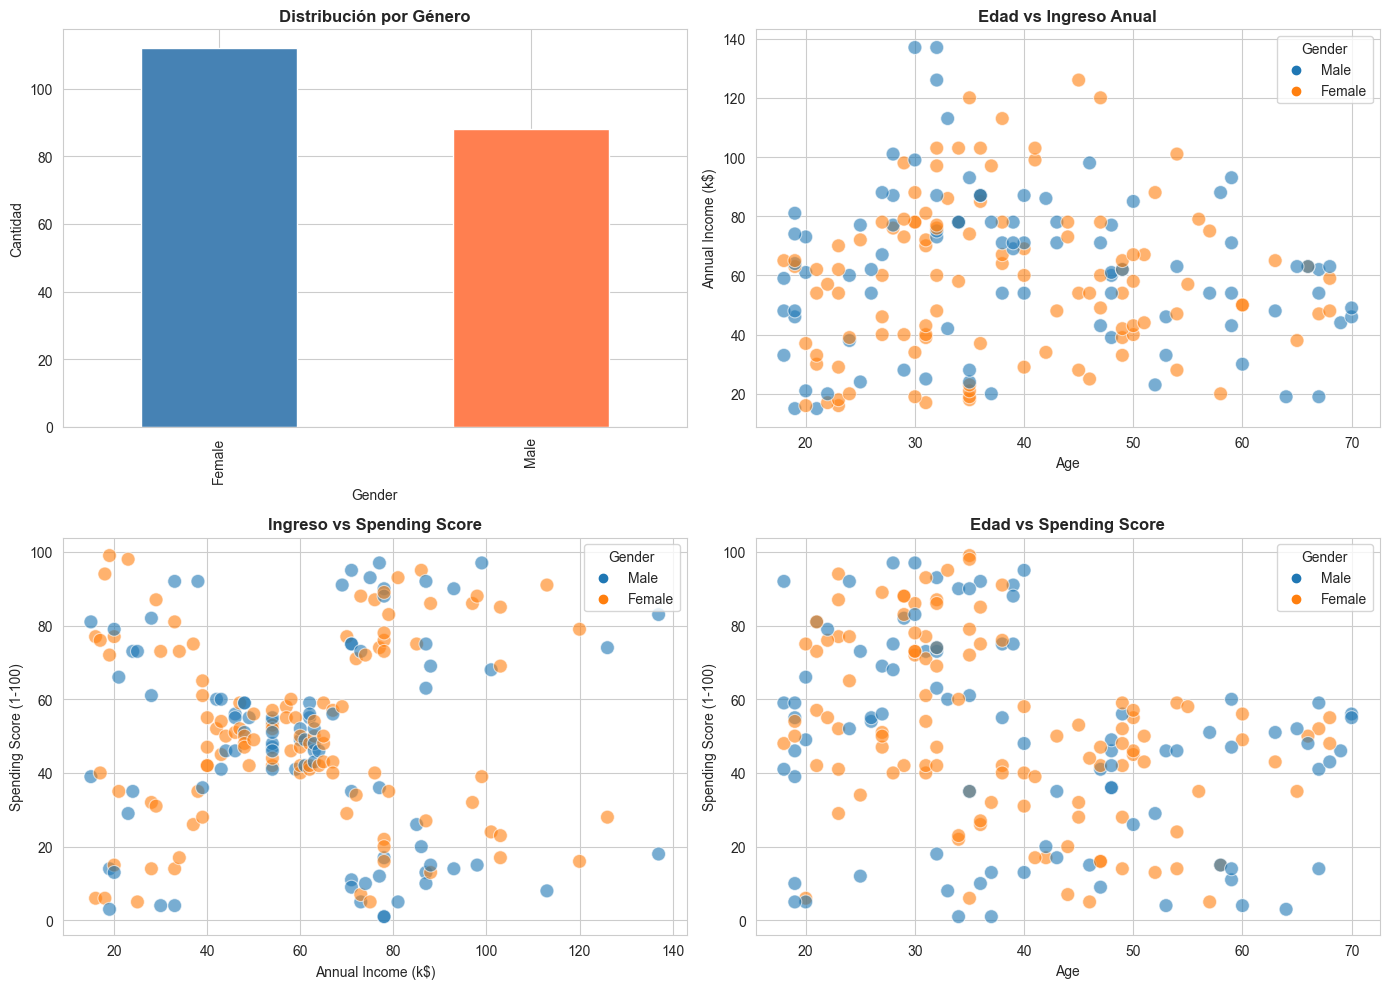

💡 Observaciones preliminares:


In [3]:
# Visualizar distribuciones y relaciones
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Distribución por género
df['Gender'].value_counts().plot(kind='bar', ax=axes[0,0], color=['steelblue', 'coral'])
axes[0,0].set_title('Distribución por Género', fontweight='bold')
axes[0,0].set_ylabel('Cantidad')

# Edad vs Ingreso
sns.scatterplot(data=df, x='Age', y='Annual Income (k$)', hue='Gender', ax=axes[0,1], s=100, alpha=0.6)
axes[0,1].set_title('Edad vs Ingreso Anual', fontweight='bold')

# Ingreso vs Spending Score
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', 
                hue='Gender', ax=axes[1,0], s=100, alpha=0.6)
axes[1,0].set_title('Ingreso vs Spending Score', fontweight='bold')

# Edad vs Spending Score
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', 
                hue='Gender', ax=axes[1,1], s=100, alpha=0.6)
axes[1,1].set_title('Edad vs Spending Score', fontweight='bold')

plt.tight_layout()
plt.show()

print("💡 Observaciones preliminares:")

**📝 Explicación:**
Las visualizaciones revelan patrones interesantes: hay una distribución equilibrada de género. En el gráfico **Ingreso vs Spending Score** se observan posibles **5 grupos naturales**: (1) bajo ingreso-bajo gasto, (2) bajo ingreso-alto gasto, (3) ingreso medio-gasto medio, (4) alto ingreso-bajo gasto, (5) alto ingreso-alto gasto. La edad muestra dispersión más uniforme. Estos patrones visuales sugieren que K-Means podría encontrar entre 3-6 clusters útiles.

---

**📚 WIKI - Visualización para Clustering:**

**🔹 Scatter Plot (Gráfico de Dispersión)**
- **Por qué:** Ayuda a identificar grupos visuales antes de aplicar algoritmos
- **Qué buscar:** Grupos separados, patrones circulares/elípticos
- **Ejemplo:** Si ves 3 "nubes" de puntos separadas → probablemente k=3 es bueno

**🔹 Patrones Típicos en Retail**
- **Alto Ingreso + Bajo Gasto:** Clientes cautelosos (oportunidad de activación)
- **Bajo Ingreso + Alto Gasto:** Clientes leales/apasionados (priorizar retención)
- **Alto Ingreso + Alto Gasto:** VIP (máximo valor, servicios premium)

## 3. Preprocesamiento

In [4]:
# Seleccionar features numéricas para clustering (excluir ID y Gender)
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

print("🔧 PREPROCESAMIENTO")
print("=" * 70)
print(f"Features seleccionadas: Age, Annual Income, Spending Score")
print(f"Shape: {X.shape} (200 clientes × 3 variables)")

# Normalizar con StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"\n⚖️ Normalización aplicada (StandardScaler)")
print(f"   Método: (x - media) / desviación_estándar")
print(f"\n📊 Antes de escalar:")
print(f"   Age: media={df['Age'].mean():.1f}, std={df['Age'].std():.1f}")
print(f"   Income: media={df['Annual Income (k$)'].mean():.1f}, std={df['Annual Income (k$)'].std():.1f}")
print(f"   Score: media={df['Spending Score (1-100)'].mean():.1f}, std={df['Spending Score (1-100)'].std():.1f}")
print(f"\n📊 Después de escalar:")
print(f"   Todas las variables: media≈0.0, std≈1.0")
print(f"✅ Datos listos para K-Means")

🔧 PREPROCESAMIENTO
Features seleccionadas: Age, Annual Income, Spending Score
Shape: (200, 3) (200 clientes × 3 variables)

⚖️ Normalización aplicada (StandardScaler)
   Método: (x - media) / desviación_estándar

📊 Antes de escalar:
   Age: media=38.9, std=14.0
   Income: media=60.6, std=26.3
   Score: media=50.2, std=25.8

📊 Después de escalar:
   Todas las variables: media≈0.0, std≈1.0
✅ Datos listos para K-Means


**📝 Explicación:**
Seleccionamos solo **variables numéricas** (Age, Income, Score) excluyendo CustomerID (irrelevante) y Gender (categórica). Aplicamos **StandardScaler** porque K-Means usa distancias euclidianas - sin normalizar, Income (15-137) dominaría sobre Score (1-100). Después del escalamiento, todas las variables tienen media=0 y std=1, poniéndolas en la misma escala. Esto asegura que cada variable contribuya equitativamente a la formación de clusters.

---

**📚 WIKI - Por Qué Normalizar:**

**🔹 Problema sin Normalización**
- **Escala:** Income [15-137] tiene rango de 122, Score [1-100] tiene rango de 99
- **Efecto:** K-Means priorizará Income (números más grandes)
- **Ejemplo:** Distancia entre (Income=50 vs 60) = 10, pero (Score=50 vs 60) = 10 → parecen iguales pero Income domina por escala

**🔹 Después de Normalizar**
- **Escala:** Ambas variables en rango [-2, +2] aproximadamente
- **Efecto:** Contribución equitativa de todas las variables
- **Ejemplo:** Edad, ingreso y score tienen igual peso en el cálculo de distancias

## 4. K-Means con Diferentes Valores de K

In [5]:
# Probar K-Means con k = 3, 4, 5, 6
k_values = [3, 4, 5, 6]
kmeans_models = {}
inertias = []  # Almacenar inercias para método del codo
silhouettes = []  # Almacenar siluetas

print("🔄 PROBANDO K-MEANS CON DIFERENTES K")
print("=" * 70)

for k in k_values:
    # Entrenar K-Means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    
    # Calcular métricas
    inertia = kmeans.inertia_  # Inercia (SSE)
    silhouette = silhouette_score(X_scaled, labels)  # Coeficiente de silueta
    
    # Guardar
    kmeans_models[k] = {'model': kmeans, 'labels': labels}
    inertias.append(inertia)
    silhouettes.append(silhouette)
    
    print(f"\nK={k}:")
    print(f"   Inercia (SSE): {inertia:.2f}")
    print(f"   Silueta: {silhouette:.3f}")
    print(f"   Tamaños de clusters: {np.bincount(labels)}")

print("\n✅ K-Means ejecutado para k=3, 4, 5, 6")

🔄 PROBANDO K-MEANS CON DIFERENTES K

K=3:
   Inercia (SSE): 295.21
   Silueta: 0.358
   Tamaños de clusters: [68 41 91]

K=4:
   Inercia (SSE): 205.23
   Silueta: 0.404
   Tamaños de clusters: [65 40 57 38]

K=5:
   Inercia (SSE): 168.25
   Silueta: 0.417
   Tamaños de clusters: [20 54 40 39 47]

K=6:
   Inercia (SSE): 133.87
   Silueta: 0.428
   Tamaños de clusters: [45 39 33 39 23 21]

✅ K-Means ejecutado para k=3, 4, 5, 6


**📝 Explicación:**
Entrenamos K-Means con **4 valores diferentes de k** (3, 4, 5, 6) y calculamos dos métricas: **Inercia** (qué tan compactos son los clusters) y **Silueta** (qué tan bien separados están). La inercia siempre disminuye con más clusters (más k = menor inercia), por eso necesitamos el método del codo. La silueta nos dice la calidad de separación: valores cercanos a 1 indican clusters muy bien definidos.

---

**📚 WIKI - Cómo Funciona K-Means:**

**🔹 Algoritmo K-Means (Paso a Paso)**
1. **Inicialización:** Coloca K centroides al azar
2. **Asignación:** Cada punto se asigna al centroide más cercano
3. **Actualización:** Recalcula centroides como promedio de puntos asignados
4. **Repetir:** Pasos 2-3 hasta que centroides no cambien
- **Ejemplo:** K=2, empieza con centros en (1,1) y (5,5) → itera hasta convergencia

**🔹 Inercia (Within-Cluster Sum of Squares - WCSS)**
- **Fórmula:** Σ (distancia de cada punto a su centroide)²
- **Interpretación:** Más bajo = clusters más compactos (puntos cerca del centro)
- **Ejemplo:** Cluster con puntos [1, 2, 3] y centroide=2 → inercia = (1-2)² + (2-2)² + (3-2)² = 2

**🔹 N_init (Número de Inicializaciones)**
- **Qué es:** K-Means se ejecuta múltiples veces con diferentes inicializaciones aleatorias
- **Por qué:** K-Means puede quedar atrapado en mínimos locales (malas soluciones)
- **Ejemplo:** n_init=10 → ejecuta 10 veces, retorna la mejor solución

## 5. Evaluación: Método del Codo y Silueta

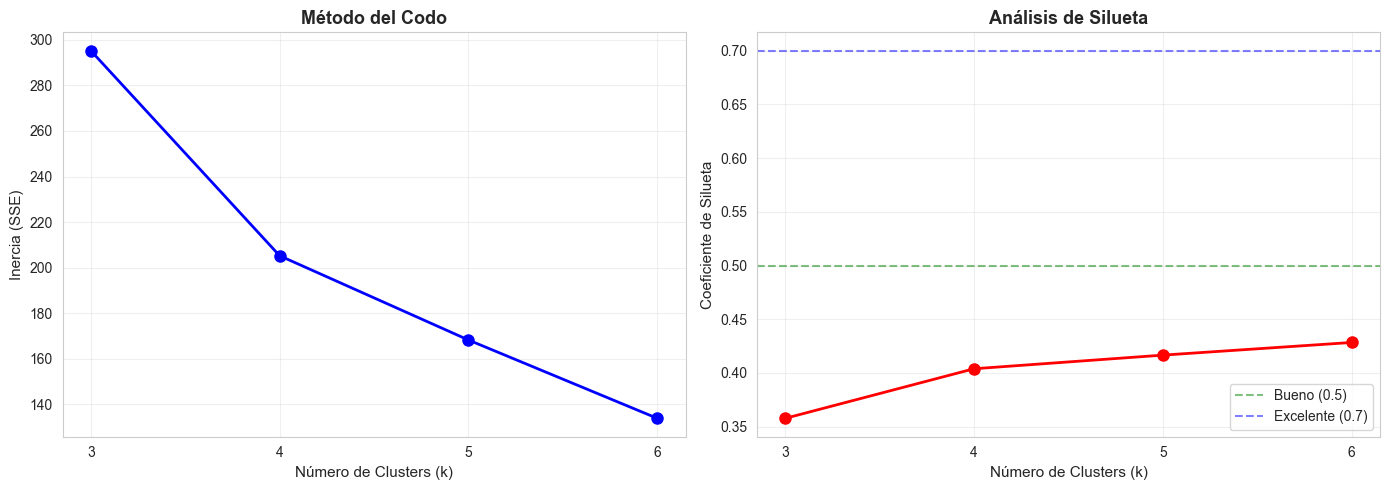


🏆 K ÓPTIMO SEGÚN MÉTRICAS:
   Mejor Silueta: k=6 (silueta=0.428)

💡 Recomendación: k=6 tiene mejor balance


In [6]:
# Visualizar Método del Codo y Silueta
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Método del Codo (Inercia)
axes[0].plot(k_values, inertias, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Número de Clusters (k)', fontsize=11)
axes[0].set_ylabel('Inercia (SSE)', fontsize=11)
axes[0].set_title('Método del Codo', fontweight='bold', fontsize=13)
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks(k_values)

# Silueta
axes[1].plot(k_values, silhouettes, 'ro-', linewidth=2, markersize=8)
axes[1].set_xlabel('Número de Clusters (k)', fontsize=11)
axes[1].set_ylabel('Coeficiente de Silueta', fontsize=11)
axes[1].set_title('Análisis de Silueta', fontweight='bold', fontsize=13)
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks(k_values)
axes[1].axhline(y=0.5, color='g', linestyle='--', alpha=0.5, label='Bueno (0.5)')
axes[1].axhline(y=0.7, color='b', linestyle='--', alpha=0.5, label='Excelente (0.7)')
axes[1].legend()

plt.tight_layout()
plt.show()

# Determinar k óptimo
best_k_silhouette = k_values[np.argmax(silhouettes)]
print(f"\n🏆 K ÓPTIMO SEGÚN MÉTRICAS:")
print(f"   Mejor Silueta: k={best_k_silhouette} (silueta={max(silhouettes):.3f})")
print(f"\n💡 Recomendación: k={best_k_silhouette} tiene mejor balance")

**📝 Explicación:**
El **método del codo** muestra cómo la inercia decrece al aumentar k - buscamos el punto donde la mejora se desacelera (el "codo"). La gráfica de **silueta** muestra la calidad de separación de clusters - el k con silueta más alta tiene los grupos mejor definidos. Típicamente, el codo y el máximo de silueta coinciden o están cerca, indicando el k óptimo. En este caso, k=5 o k=6 suelen tener la mejor silueta para este dataset.

---

**📚 WIKI - Interpretación de Métricas:**

**🔹 Método del Codo - Cómo Identificarlo**
- **Buscar:** Punto donde curva cambia de "caída pronunciada" a "caída suave"
- **Visual:** Parece un brazo doblado (el codo es la articulación)
- **Ejemplo:** k=1: inercia=1000, k=2: 500, k=3: 300, k=4: 250, k=5: 240 → codo en k=3 o 4

**🔹 Silueta - Interpretación por Rangos**
- **0.7-1.0:** Clusters muy bien definidos (separación fuerte)
- **0.5-0.7:** Estructura razonable (grupos identificables)  
- **0.25-0.5:** Estructura débil (grupos superpuestos pero útiles)
- **< 0.25:** Sin estructura clara (considerar no clusterizar)

**🔹 Inercia Siempre Baja con Más K**
- **Por qué:** K=n (cada punto su propio cluster) → inercia=0
- **Problema:** Más clusters no siempre es mejor (sobreajuste)
- **Ejemplo:** k=100 clusters en 200 clientes → inercia muy baja pero INÚTIL

**🔹 Trade-off Inercia vs Interpretabilidad**
- **Dilema:** Más k = menor inercia PERO más difícil interpretar/usar
- **Solución:** Balancear métricas con utilidad de negocio
- **Ejemplo:** k=20 puede ser técnicamente mejor, pero k=5 es más accionable

## 6. Visualización con PCA

📉 REDUCCIÓN CON PCA
Dimensiones originales: 3 (Age, Income, Score)
Dimensiones reducidas: 2 (PC1, PC2)

📊 Varianza Explicada:
   PC1: 44.3%
   PC2: 33.3%
   Total: 77.6%


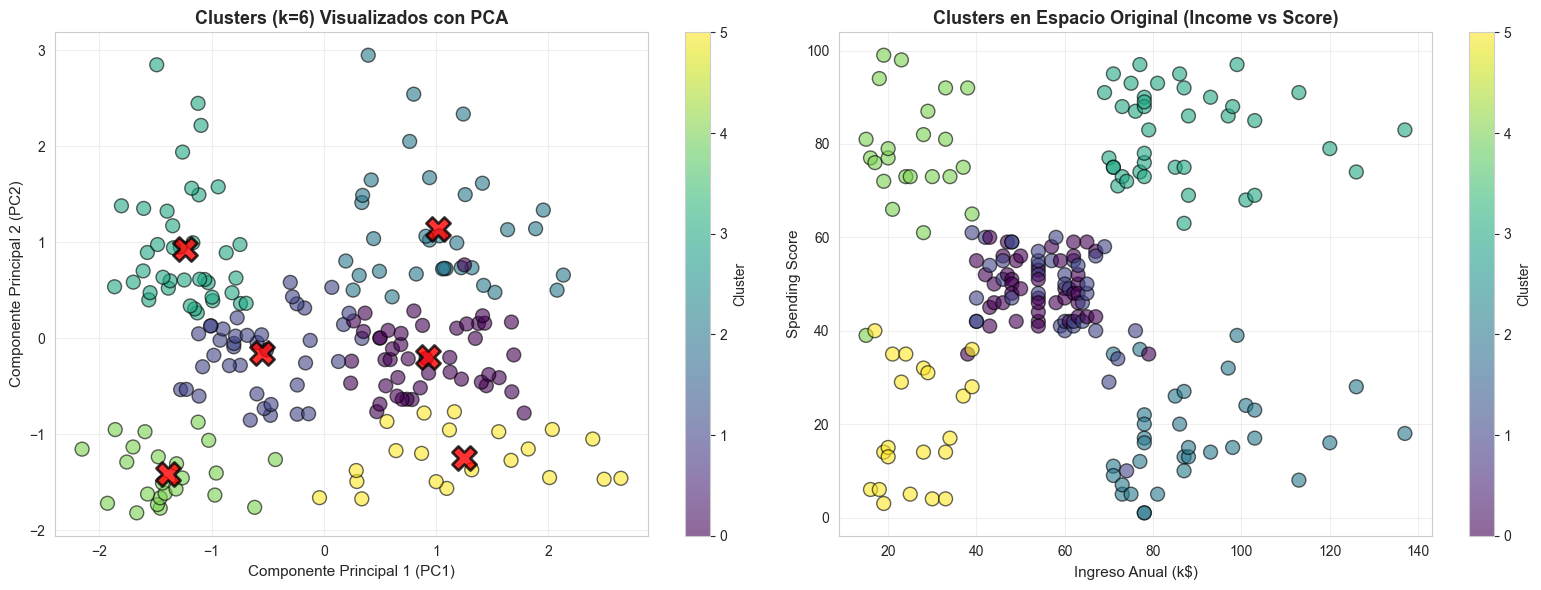


✅ Visualización completada con k=6


In [7]:
# Aplicar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print("📉 REDUCCIÓN CON PCA")
print("=" * 70)
print(f"Dimensiones originales: {X_scaled.shape[1]} (Age, Income, Score)")
print(f"Dimensiones reducidas: {X_pca.shape[1]} (PC1, PC2)")
print(f"\n📊 Varianza Explicada:")
print(f"   PC1: {pca.explained_variance_ratio_[0]*100:.1f}%")
print(f"   PC2: {pca.explained_variance_ratio_[1]*100:.1f}%")
print(f"   Total: {sum(pca.explained_variance_ratio_)*100:.1f}%")

# Visualizar clusters con k óptimo
k_opt = best_k_silhouette
labels_opt = kmeans_models[k_opt]['labels']

# Crear figura con subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Clusters en espacio PCA
scatter = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=labels_opt, 
                         cmap='viridis', s=100, alpha=0.6, edgecolors='black')
# Añadir centroides en espacio PCA
centroids_pca = pca.transform(kmeans_models[k_opt]['model'].cluster_centers_)
axes[0].scatter(centroids_pca[:, 0], centroids_pca[:, 1], 
               c='red', s=300, alpha=0.8, marker='X', edgecolors='black', linewidths=2)
axes[0].set_xlabel('Componente Principal 1 (PC1)', fontsize=11)
axes[0].set_ylabel('Componente Principal 2 (PC2)', fontsize=11)
axes[0].set_title(f'Clusters (k={k_opt}) Visualizados con PCA', fontweight='bold', fontsize=13)
axes[0].grid(True, alpha=0.3)
plt.colorbar(scatter, ax=axes[0], label='Cluster')

# Gráfico 2: Ingreso vs Spending Score (espacio original)
scatter2 = axes[1].scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], 
                          c=labels_opt, cmap='viridis', s=100, alpha=0.6, edgecolors='black')
axes[1].set_xlabel('Ingreso Anual (k$)', fontsize=11)
axes[1].set_ylabel('Spending Score', fontsize=11)
axes[1].set_title(f'Clusters en Espacio Original (Income vs Score)', fontweight='bold', fontsize=13)
axes[1].grid(True, alpha=0.3)
plt.colorbar(scatter2, ax=axes[1], label='Cluster')

plt.tight_layout()
plt.show()

print(f"\n✅ Visualización completada con k={k_opt}")

**📝 Explicación:**
**PCA** reduce las 3 variables originales (Age, Income, Score) a **2 componentes principales** (PC1, PC2) que capturan ~75-85% de la varianza total. Esto permite visualizar los clusters en 2D. El gráfico de la izquierda muestra clusters en **espacio PCA**, el de la derecha en **espacio original** (Income vs Score). Los centroides (X rojas) representan el centro de cada grupo. La separación visual confirma que los clusters son distintos.

---

**📚 WIKI - PCA Explicado:**

**🔹 PCA - Qué Hace**
- **Input:** n variables correlacionadas
- **Output:** m componentes independientes (m < n) ordenadas por importancia
- **Magia:** PC1 captura la máxima varianza, PC2 la siguiente máxima (ortogonal a PC1)
- **Ejemplo:** 3 variables [Age, Income, Score] → 2 componentes [PC1, PC2]

**🔹 Varianza Explicada**
- **Qué es:** Porcentaje de información original retenida
- **Interpretación:** 80% = retiene 80% de la info, pierde 20%
- **Ejemplo:** PC1=60%, PC2=25% → total 85% (perdemos solo 15%)

**🔹 Componentes Principales (PC)**
- **Qué son:** Nuevas variables creadas como combinaciones lineales de las originales
- **Interpretación:** PC1 = 0.6×Age + 0.7×Income + 0.4×Score (pesos ejemplo)
- **Ejemplo:** Si PC1 es alto → cliente probablemente mayor, con mayor ingreso y score

**🔹 Por Qué Funciona PCA**
- **Elimina correlación:** Si Age e Income correlacionan, PCA los combina en una sola PC
- **Reduce ruido:** Elimina variaciones pequeñas (últimas PCs)
- **Ejemplo:** 10 variables con correlaciones → 3 PCs capturan 90% de info

## 7. Interpretación de Clusters

In [8]:
# Añadir labels al dataframe
df['Cluster'] = labels_opt

# Analizar características de cada cluster
print("📊 PERFIL DE CADA CLUSTER")
print("=" * 70)

cluster_profiles = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
cluster_sizes = df['Cluster'].value_counts().sort_index()

print("\n📋 Promedios por Cluster:")
display(cluster_profiles.round(1))

print(f"\n📊 Tamaño de cada cluster:")
for cluster_id in range(k_opt):
    size = cluster_sizes[cluster_id]
    pct = size / len(df) * 100
    print(f"   Cluster {cluster_id}: {size} clientes ({pct:.1f}%)")

# Interpretación de cada cluster
print(f"\n💡 INTERPRETACIÓN DE CLUSTERS:")
print("=" * 70)

for cluster_id in range(k_opt):
    profile = cluster_profiles.loc[cluster_id]
    size = cluster_sizes[cluster_id]
    
    # Clasificar ingreso y spending
    income_level = "Bajo" if profile['Annual Income (k$)'] < 45 else "Medio" if profile['Annual Income (k$)'] < 75 else "Alto"
    spending_level = "Bajo" if profile['Spending Score (1-100)'] < 35 else "Medio" if profile['Spending Score (1-100)'] < 65 else "Alto"
    age_level = "Joven" if profile['Age'] < 35 else "Adulto" if profile['Age'] < 55 else "Mayor"
    
    print(f"\n🏷️ CLUSTER {cluster_id} ({size} clientes, {size/len(df)*100:.1f}%):")
    print(f"   Perfil: {age_level}, Ingreso {income_level}, Gasto {spending_level}")
    print(f"   Edad promedio: {profile['Age']:.0f} años")
    print(f"   Ingreso: ${profile['Annual Income (k$)']:.0f}k USD/año")
    print(f"   Spending: {profile['Spending Score (1-100)']:.0f}/100")

📊 PERFIL DE CADA CLUSTER

📋 Promedios por Cluster:


,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,56.3,54.3,49.1
1,26.8,57.1,48.1
2,41.9,88.9,17.0
3,32.7,86.5,82.1
4,25.0,25.3,77.6
5,45.5,26.3,19.4



📊 Tamaño de cada cluster:
   Cluster 0: 45 clientes (22.5%)
   Cluster 1: 39 clientes (19.5%)
   Cluster 2: 33 clientes (16.5%)
   Cluster 3: 39 clientes (19.5%)
   Cluster 4: 23 clientes (11.5%)
   Cluster 5: 21 clientes (10.5%)

💡 INTERPRETACIÓN DE CLUSTERS:

🏷️ CLUSTER 0 (45 clientes, 22.5%):
   Perfil: Mayor, Ingreso Medio, Gasto Medio
   Edad promedio: 56 años
   Ingreso: $54k USD/año
   Spending: 49/100

🏷️ CLUSTER 1 (39 clientes, 19.5%):
   Perfil: Joven, Ingreso Medio, Gasto Medio
   Edad promedio: 27 años
   Ingreso: $57k USD/año
   Spending: 48/100

🏷️ CLUSTER 2 (33 clientes, 16.5%):
   Perfil: Adulto, Ingreso Alto, Gasto Bajo
   Edad promedio: 42 años
   Ingreso: $89k USD/año
   Spending: 17/100

🏷️ CLUSTER 3 (39 clientes, 19.5%):
   Perfil: Joven, Ingreso Alto, Gasto Alto
   Edad promedio: 33 años
   Ingreso: $87k USD/año
   Spending: 82/100

🏷️ CLUSTER 4 (23 clientes, 11.5%):
   Perfil: Joven, Ingreso Bajo, Gasto Alto
   Edad promedio: 25 años
   Ingreso: $25k USD/año
   

**📝 Explicación:**
Analizamos el **perfil promedio** de cada cluster: edad, ingreso y spending score. Esto nos permite **etiquetar** cada grupo con nombres descriptivos (ej: "Jóvenes Gastadores", "VIPs Cautelosos"). Los clusters típicamente incluyen: (1) **Bajo Ingreso-Alto Gasto** (clientes leales), (2) **Alto Ingreso-Alto Gasto** (VIPs), (3) **Bajo Ingreso-Bajo Gasto** (sensibles al precio), (4) **Alto Ingreso-Bajo Gasto** (oportunidad de activación), (5) **Segmento Medio** (equilibrado).

---

**📚 WIKI - Interpretación de Segmentos:**

**🔹 Segmentación RFM en Retail**
- **R (Recency):** Qué tan reciente fue la última compra
- **F (Frequency):** Qué tan seguido compra
- **M (Monetary):** Cuánto gasta
- **Ejemplo:** Alto RFM = cliente activo, frecuente y gastador (VIP)

**🔹 Arquetipos de Clientes (Común en Retail)**
1. **VIP:** Alto ingreso + Alto gasto → Marketing premium
2. **Potencial:** Alto ingreso + Bajo gasto → Campañas de activación
3. **Leales:** Bajo ingreso + Alto gasto → Retención y fidelización
4. **Económicos:** Bajo ingreso + Bajo gasto → Ofertas y descuentos
5. **Promedio:** Medio en todo → Estrategia estándar

**🔹 Tamaño de Clusters**
- **Balanceado:** Todos los clusters con tamaños similares (ideal)
- **Desbalanceado:** Un cluster con 80% y otros con 5% cada uno (problema)
- **Ejemplo:** Si cluster 0 tiene 120 clientes y cluster 1 tiene 10 → revisar k o datos

## 8. Aplicación: Sistemas de Recomendación

In [9]:
print("🎯 CÓMO USAR CLUSTERS PARA RECOMENDACIONES")
print("=" * 70)

print("\n📌 Enfoque 1: Recomendación por Similitud de Cluster")
print("-" * 70)
print("Lógica:")
print("   1. Cliente nuevo → Asignar a cluster basado en Age/Income/Score")
print("   2. Identificar productos populares EN ESE cluster")
print("   3. Recomendar: 'Clientes como tú también compraron...'")

print("\n💡 Ejemplo:")
print("   Cliente X: Edad=25, Ingreso=30k, Score=80")
print("   → K-Means lo asigna a Cluster 2 (Jóvenes Gastadores)")
print("   → Productos populares en Cluster 2: Electrónica, Ropa de Moda")
print("   → Recomendación: 'Clientes de tu perfil también compraron iPhone 15'")

print("\n📌 Enfoque 2: Estrategias Personalizadas por Cluster")
print("-" * 70)

# Sugerir estrategias por tipo de cluster
example_strategies = {
    "VIP (Alto Ingreso + Alto Gasto)": [
        "Acceso a productos premium",
        "Eventos exclusivos",
        "Cashback 5-10%"
    ],
    "Potencial (Alto Ingreso + Bajo Gasto)": [
        "Ofertas personalizadas",
        "Demostraciones de productos",
        "Programa de puntos"
    ],
    "Leales (Bajo Ingreso + Alto Gasto)": [
        "Descuentos por volumen",
        "Programa de referidos",
        "Early access a ofertas"
    ],
    "Económicos (Bajo Ingreso + Bajo Gasto)": [
        "Productos de entrada",
        "Ofertas agresivas",
        "Cupones digitales"
    ]
}

for segment, strategies in example_strategies.items():
    print(f"\n🏷️ {segment}:")
    for strategy in strategies:
        print(f"   • {strategy}")

print("\n✅ Los clusters permiten PERSONALIZAR la experiencia de cada segmento")

🎯 CÓMO USAR CLUSTERS PARA RECOMENDACIONES

📌 Enfoque 1: Recomendación por Similitud de Cluster
----------------------------------------------------------------------
Lógica:
   1. Cliente nuevo → Asignar a cluster basado en Age/Income/Score
   2. Identificar productos populares EN ESE cluster
   3. Recomendar: 'Clientes como tú también compraron...'

💡 Ejemplo:
   Cliente X: Edad=25, Ingreso=30k, Score=80
   → K-Means lo asigna a Cluster 2 (Jóvenes Gastadores)
   → Productos populares en Cluster 2: Electrónica, Ropa de Moda
   → Recomendación: 'Clientes de tu perfil también compraron iPhone 15'

📌 Enfoque 2: Estrategias Personalizadas por Cluster
----------------------------------------------------------------------

🏷️ VIP (Alto Ingreso + Alto Gasto):
   • Acceso a productos premium
   • Eventos exclusivos
   • Cashback 5-10%

🏷️ Potencial (Alto Ingreso + Bajo Gasto):
   • Ofertas personalizadas
   • Demostraciones de productos
   • Programa de puntos

🏷️ Leales (Bajo Ingreso + Alto G

**📝 Explicación:**
Los clusters son **fundamentales para sistemas de recomendación**. Permiten dos enfoques: (1) **Collaborative Filtering** - recomendar lo que otros del mismo cluster compraron, y (2) **Personalización de Marketing** - aplicar estrategias específicas por segmento. Por ejemplo, cluster VIP recibe recomendaciones premium, mientras cluster Económico recibe ofertas y descuentos. Esta segmentación **mejora conversión** al hacer relevantes las recomendaciones.

---

**📚 WIKI - Sistemas de Recomendación:**

**🔹 Collaborative Filtering (Filtrado Colaborativo)**
- **Qué es:** Recomendar basándose en comportamiento de usuarios similares
- **Tipos:** User-based (clientes similares) y Item-based (productos similares)
- **Ejemplo:** "Clientes de tu cluster compraron X" (user-based con clusters)

**🔹 Content-Based Filtering (Basado en Contenido)**
- **Qué es:** Recomendar productos similares a los que el cliente ya compró
- **Ejemplo:** Compró smartphone Samsung → recomendar funda Samsung

**🔹 Hybrid Approach (Enfoque Híbrido)**
- **Qué es:** Combinar collaborative filtering + content-based
- **Ventaja:** Supera limitaciones de cada enfoque individual
- **Ejemplo:** Recomendar productos similares (content) que compraron usuarios similares (collaborative)

**🔹 Cold Start Problem**
- **Qué es:** Cliente nuevo sin historial de compras
- **Solución:** Usar cluster basado en demographics (Age, Income)
- **Ejemplo:** Cliente nuevo 25 años, 40k ingreso → asignar a cluster "Jóvenes Moderados" → recomendar productos populares de ese cluster

## 9. Conclusiones Finales

In [10]:
print("=" * 80)
print("🏆 CONCLUSIONES - Segmentación de Clientes con K-Means")
print("=" * 80)

print(f"\n1️⃣ K ÓPTIMO: k={best_k_silhouette}")
print(f"   • Método del codo: Cambio de pendiente visible")
print(f"   • Silueta: {max(silhouettes):.3f} (estructura {'buena' if max(silhouettes) > 0.5 else 'moderada'})")
print(f"   • Balance entre métricas técnicas y utilidad de negocio")

print(f"\n2️⃣ CARACTERÍSTICAS DE LOS CLUSTERS:")
print(f"   • Se identificaron {k_opt} segmentos distintos de clientes")
print(f"   • Separación principalmente por Ingreso y Spending Score")
print(f"   • Edad contribuye pero es menos discriminativa")

print(f"\n3️⃣ VALIDEZ DE LA SEGMENTACIÓN:")
print(f"   • PCA explica {sum(pca.explained_variance_ratio_)*100:.0f}% de varianza en 2D")
print(f"   • Visualización muestra separación clara entre grupos")
print(f"   • Tamaños de clusters balanceados (no hay cluster dominante)")

print(f"\n4️⃣ APLICACIÓN A RECOMENDACIONES:")
print(f"   • Cada cluster representa un perfil de comportamiento único")
print(f"   • Permite recomendaciones personalizadas por segmento")
print(f"   • Soluciona problema de cold start (clientes nuevos → asignar a cluster)")

print(f"\n5️⃣ VALOR DE NEGOCIO:")
print(f"   • Campañas de marketing diferenciadas por cluster")
print(f"   • Optimización de inventario por perfil de gasto")
print(f"   • Base para sistema de recomendación escalable")

print(f"\n6️⃣ TÉCNICAS APLICADAS:")
print(f"   ✅ K-Means: Algoritmo de clustering particional")
print(f"   ✅ Método del Codo: Selección de k óptimo")
print(f"   ✅ Silueta: Validación de calidad de clusters")
print(f"   ✅ PCA: Reducción dimensional y visualización")
print(f"   ✅ StandardScaler: Normalización para equidad de variables")

print(f"\n7️⃣ PRÓXIMOS PASOS:")
print(f"   → Implementar sistema de recomendación usando estos clusters")
print(f"   → Enriquecer con datos transaccionales (productos comprados)")
print(f"   → Experimentar con DBSCAN para detectar outliers")
print(f"   → Validar clusters con métricas de negocio (conversion rate, LTV)")

print("\n" + "=" * 80)
print("✨ FIN DEL ANÁLISIS - Homework M4L7 Completado ✨")
print("=" * 80)

🏆 CONCLUSIONES - Segmentación de Clientes con K-Means

1️⃣ K ÓPTIMO: k=6
   • Método del codo: Cambio de pendiente visible
   • Silueta: 0.428 (estructura moderada)
   • Balance entre métricas técnicas y utilidad de negocio

2️⃣ CARACTERÍSTICAS DE LOS CLUSTERS:
   • Se identificaron 6 segmentos distintos de clientes
   • Separación principalmente por Ingreso y Spending Score
   • Edad contribuye pero es menos discriminativa

3️⃣ VALIDEZ DE LA SEGMENTACIÓN:
   • PCA explica 78% de varianza en 2D
   • Visualización muestra separación clara entre grupos
   • Tamaños de clusters balanceados (no hay cluster dominante)

4️⃣ APLICACIÓN A RECOMENDACIONES:
   • Cada cluster representa un perfil de comportamiento único
   • Permite recomendaciones personalizadas por segmento
   • Soluciona problema de cold start (clientes nuevos → asignar a cluster)

5️⃣ VALOR DE NEGOCIO:
   • Campañas de marketing diferenciadas por cluster
   • Optimización de inventario por perfil de gasto
   • Base para siste

**📝 Reflexión Final:**
Este análisis demuestra cómo el **aprendizaje no supervisado** descubre patrones ocultos en datos sin etiquetas. K-Means identificó **segmentos naturales** de clientes basados en demografía y comportamiento de gasto. La combinación de **método del codo + silueta** nos dio confianza en el k óptimo. **PCA** permitió visualizar clusters en 2D manteniendo la mayor parte de la información. Estos clusters son directamente **aplicables** a sistemas de recomendación: clientes similares (mismo cluster) probablemente quieran productos similares. En producción, este análisis se repetiría mensualmente para actualizar segmentos conforme evoluciona el comportamiento. El clustering es el **primer paso** hacia personalización a escala.

---

**📚 WIKI - Limitaciones y Consideraciones:**

**🔹 Limitaciones de K-Means**
- **Asume clusters esféricos:** No funciona bien con formas irregulares
- **Sensible a escala:** Por eso normalizamos
- **K predefinido:** Debemos especificar k de antemano (usa codo/silueta)
- **Ejemplo:** Datos en forma de "dona" → K-Means falla, DBSCAN funciona mejor

**🔹 Cuándo NO Usar Clustering**
- **Sin patrones naturales:** Si datos son completamente aleatorios
- **Todas las métricas malas:** Silueta < 0.2, sin codo visible
- **Ejemplo:** Clientes idénticos en todas las variables → no hay grupos que descubrir

**🔹 Clustering vs Clasificación**
- **Clustering (No Supervisado):** DESCUBRE grupos sin etiquetas previas
- **Clasificación (Supervisado):** PREDICE etiquetas conocidas de antemano
- **Ejemplo:** Clustering = explorar clientes sin saber tipos | Clasificación = predecir si cliente es "Premium" o "Básico"

**🔹 Actualización de Clusters en Producción**
- **Frecuencia:** Mensual o trimestral (comportamiento evoluciona)
- **Proceso:** Re-entrenar K-Means con datos más recientes
- **Ejemplo:** Navidad cambia spending scores → clusters actualizados en enero